# Background

### Z+Jets

In [1]:
import awkward as ak
import pandas as pd
import numpy as np
import vector
from coffea.nanoevents import NanoEventsFactory
from coffea.nanoevents import NanoAODSchema, DelphesSchema
import mplhep as hep
import matplotlib.pyplot as plt
import seaborn as sns
import DM_HEP_AN as dm
from math import pi
from funcs import *
hep.style.use("CMS")
#%matplotlib inline
plt.ioff()

lum = 1 # fb-1

In [2]:
csvFiles = "background/ZpJets/ZpJets_"
nFiles = 30
dfs = [pd.read_csv(csvFiles+str(i)+".csv") for i in range(1,nFiles+1)]
data_z = pd.concat(dfs)
data_z.to_csv("background/ZpJets.csv", index=False)

In [3]:
data_z

,jet_pt0,jet_pt1,jet_pt2,jet_pt3,jet_eta0,jet_eta1,jet_eta2,jet_eta3,jet_phi0,jet_phi1,...,electron_eta2,electron_eta3,electron_phi0,electron_phi1,electron_phi2,electron_phi3,electron_charge0,electron_charge1,electron_charge2,electron_charge3
0,4.098873,3.994257,3.030382,NaN,-0.513310,-0.018580,-4.182301,NaN,2.334446,1.387031,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11.798141,7.737942,6.914221,6.273020,4.573291,1.359862,-0.115720,-5.028740,1.238127,-2.195158,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,14.973746,5.966704,5.945081,4.751918,-0.912640,-4.898161,0.937833,-1.075210,-1.969545,0.329583,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.759025,4.054801,3.453021,NaN,-4.046280,4.051113,0.217294,NaN,2.776844,2.521697,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.678748,NaN,NaN,NaN,1.156869,NaN,NaN,NaN,2.329423,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39898,23.113213,9.536195,8.331130,5.946726,0.240447,2.059486,-2.712711,-1.088681,-2.950839,1.134760,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39899,54.850525,31.135017,23.432001,5.275200,-2.909562,-1.534360,-4.147147,-3.626972,0.366227,-2.833044,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39900,38.772150,34.492565,7.828727,7.340289,2.836175,-1.888222,4.101792,1.462616,-1.922770,0.269354,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39901,7.622964,7.127806,5.830260,5.797111,-2.137029,4.716451,2.188124,-3.791510,-2.140064,-0.231464,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
data_z.describe()

,jet_pt0,jet_pt1,jet_pt2,jet_pt3,jet_eta0,jet_eta1,jet_eta2,jet_eta3,jet_phi0,jet_phi1,...,electron_eta2,electron_eta3,electron_phi0,electron_phi1,electron_phi2,electron_phi3,electron_charge0,electron_charge1,electron_charge2,electron_charge3
count,1.150622e+06,1.084158e+06,1.012152e+06,942743.000000,1.150622e+06,1.084158e+06,1.012152e+06,942743.000000,1.150622e+06,1.084158e+06,...,214.000000,13.000000,47946.000000,4246.000000,214.000000,13.000000,47946.000000,4246.000000,214.000000,13.000000
mean,2.126027e+01,1.174440e+01,8.275946e+00,6.781118,2.383240e-03,6.334083e-03,1.436802e-02,0.011166,4.121611e-05,2.158472e-03,...,0.147523,0.380784,-0.001037,-0.006344,-0.134362,0.875358,-0.001502,-0.019783,0.065421,-0.384615
std,2.557663e+01,1.365114e+01,6.811240e+00,4.134635,2.290709e+00,2.514896e+00,2.600764e+00,2.643253,1.813158e+00,1.813793e+00,...,2.767456,2.557170,1.811289,1.818571,1.761329,1.600314,1.000009,0.999922,1.000197,0.960769
min,3.000007e+00,3.000011e+00,3.000011e+00,3.000001,-5.593321e+00,-5.601238e+00,-5.596478e+00,-5.597125,-3.141591e+00,-3.141591e+00,...,-4.927254,-3.537830,-3.141193,-3.138750,-3.118356,-2.874632,-1.000000,-1.000000,-1.000000,-1.000000
25%,8.232197e+00,5.830815e+00,4.934228e+00,4.469314,-1.683079e+00,-1.906307e+00,-2.002421e+00,-2.058031,-1.570087e+00,-1.569192e+00,...,-2.149443,-1.161974,-1.580417,-1.555206,-1.459784,0.272021,-1.000000,-1.000000,-1.000000,-1.000000
50%,1.321474e+01,8.377915e+00,6.748674e+00,5.910207,-2.289463e-03,-2.931078e-03,-6.016429e-04,-0.006263,-4.989643e-04,3.547451e-03,...,0.143953,0.458470,-0.001092,-0.030677,-0.240040,1.102887,-1.000000,-1.000000,1.000000,-1.000000
75%,2.411581e+01,1.251700e+01,9.319826e+00,7.841842,1.674617e+00,1.891997e+00,1.998633e+00,2.048695,1.571636e+00,1.572109e+00,...,2.419704,2.460870,1.560554,1.548130,1.319627,1.762417,1.000000,1.000000,1.000000,1.000000
max,1.253642e+03,8.111154e+02,4.782599e+02,241.225230,5.996959e+00,6.000472e+00,5.997924e+00,5.999251,3.141592e+00,3.141586e+00,...,5.161246,4.659732,3.141570,3.141402,3.129135,3.134139,1.000000,1.000000,1.000000,1.000000


In [4]:
csvFiles = "background/WpJets/WpJets_"
nFiles = 30
dfs = [pd.read_csv(csvFiles+str(i)+".csv") for i in range(1,nFiles+1)]
data_w = pd.concat(dfs)
data_w.to_csv("background/WpJets.csv", index=False)

In [5]:
data_w

,jet_pt0,jet_pt1,jet_pt2,jet_pt3,jet_eta0,jet_eta1,jet_eta2,jet_eta3,jet_phi0,jet_phi1,...,electron_eta2,electron_eta3,electron_phi0,electron_phi1,electron_phi2,electron_phi3,electron_charge0,electron_charge1,electron_charge2,electron_charge3
0,28.222376,5.638002,4.496588,3.529714,-2.949326,-2.499641,3.079924,-3.498990,2.836737,-1.020999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7.699357,6.276242,4.797313,4.376765,-0.514840,-3.350588,-0.899159,0.935917,0.834013,-2.620557,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16.280712,14.330416,8.919563,6.994516,-4.552525,2.795676,-1.408053,0.593003,2.099661,-1.320631,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,27.970625,6.510084,5.437975,4.527232,-0.340904,1.009112,1.125909,-4.168434,-1.481624,3.026858,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,26.476050,6.379861,3.833766,3.722295,2.709292,-0.134858,1.497421,0.844396,-0.717510,-2.960393,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41298,10.897882,7.433998,3.759399,3.276498,0.207990,0.603606,-4.497383,-3.239177,-3.125548,-2.271640,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41299,9.639870,8.215732,7.003909,4.955512,-2.843127,-4.215545,-3.778027,1.674377,-2.033398,-1.515724,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41300,6.415229,NaN,NaN,NaN,2.242230,NaN,NaN,NaN,-2.021781,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41301,5.771332,4.846374,4.601347,4.517435,5.147875,4.264405,2.440262,-2.403329,-2.260624,-0.271791,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
data_w.describe()

,jet_pt0,jet_pt1,jet_pt2,jet_pt3,jet_eta0,jet_eta1,jet_eta2,jet_eta3,jet_phi0,jet_phi1,...,electron_eta2,electron_eta3,electron_phi0,electron_phi1,electron_phi2,electron_phi3,electron_charge0,electron_charge1,electron_charge2,electron_charge3
count,1.188535e+06,1.117727e+06,1.042130e+06,969579.000000,1.188535e+06,1.117727e+06,1.042130e+06,969579.000000,1.188535e+06,1.117727e+06,...,1853.000000,87.000000,380369.000000,22101.000000,1853.000000,87.000000,380369.000000,22101.000000,1853.000000,87.000000
mean,2.169165e+01,1.187522e+01,8.328157e+00,6.805210,9.807883e-04,4.650863e-03,1.269456e-02,0.015005,-5.629007e-05,-1.429760e-03,...,0.143463,0.275421,0.005747,-0.016937,-0.118315,-0.198167,0.152649,-0.003213,-0.033999,0.172414
std,2.404273e+01,1.339853e+01,6.779199e+00,4.152618,2.315720e+00,2.512439e+00,2.605157e+00,2.652608,1.813281e+00,1.813096e+00,...,2.759568,2.769036,1.812475,1.806068,1.804770,1.763241,0.988282,1.000017,0.999692,0.990735
min,3.000069e+00,3.000013e+00,3.000003e+00,3.000001,-5.602970e+00,-5.599250e+00,-5.602629e+00,-5.600941,-3.141592e+00,-3.141589e+00,...,-4.993716,-4.895517,-3.141586,-3.140944,-3.137936,-3.135631,-1.000000,-1.000000,-1.000000,-1.000000
25%,8.387294e+00,5.853622e+00,4.936267e+00,4.464437,-1.717684e+00,-1.903748e+00,-2.005435e+00,-2.066373,-1.568630e+00,-1.571456e+00,...,-2.118734,-1.394329,-1.562678,-1.578762,-1.699564,-1.839037,-1.000000,-1.000000,-1.000000,-1.000000
50%,1.392419e+01,8.471475e+00,6.777308e+00,5.917983,-3.883398e-03,-6.876193e-03,-6.784036e-03,-0.001862,7.000102e-04,-1.083244e-03,...,0.059803,0.771921,0.009460,-0.032710,-0.219263,-0.453794,1.000000,-1.000000,-1.000000,1.000000
75%,2.688428e+01,1.281569e+01,9.397515e+00,7.878523,1.707405e+00,1.883585e+00,2.001564e+00,2.063064,1.570313e+00,1.566311e+00,...,2.467849,2.283747,1.574572,1.547675,1.436747,1.385954,1.000000,1.000000,1.000000,1.000000
max,8.241637e+02,6.597548e+02,3.798388e+02,199.155000,5.998601e+00,5.999008e+00,5.999980e+00,6.001646,3.141587e+00,3.141590e+00,...,5.188930,4.744041,3.141577,3.140847,3.131566,3.092609,1.000000,1.000000,1.000000,1.000000


Cross Sections

In [6]:
outFile = "background/VBFDM_EAFIT_24228.out"
outData = open(outFile, "r")
outText = outData.read()

In [7]:
CSs = {"run": [],
       "ZpJets": [],
       "errorZpJets": [],
       "NeventsZpJets": [],
       "WpJets": [],
       "errorWpJets": [],
       "NeventsWpJets": []}
indexCS = outText.find('Matched cross-section :   ')
indexPM = outText.find(' +- ', indexCS)
indexPB = outText.find(' pb', indexCS)
indexNe = outText.find('Nb of events after merging :  ', indexCS)
counter = 1
run = 1
while indexCS != -1:
    #print("Cross-section: ",outText[indexCS+26:indexPB+3])
    if counter <= 10:
        CSs["ZpJets"].append(float(outText[indexCS+26:indexPM]))
        CSs["errorZpJets"].append(float(outText[indexPM+4:indexPB]))
        CSs["NeventsZpJets"].append(int(outText[indexNe+30:indexNe+36]))
        CSs["run"].append(run)
        run += 1
    else:
        CSs["WpJets"].append(float(outText[indexCS+26:indexPM]))
        CSs["errorWpJets"].append(float(outText[indexPM+4:indexPB]))
        CSs["NeventsWpJets"].append(int(outText[indexNe+30:indexNe+36]))
    indexCS = outText.find('Matched cross-section :', indexCS+1)
    indexPM = outText.find(' +- ', indexCS)
    indexPB = outText.find(' pb', indexCS)
    indexNe = outText.find('Nb of events after merging :  ', indexCS)
    counter +=1

In [8]:
outFile = "background/VBFDM_EAFIT_25087.out"
outData = open(outFile, "r")
outText = outData.read()

In [9]:
indexCS = outText.find('Matched cross-section :   ')
indexPM = outText.find(' +- ', indexCS)
indexPB = outText.find(' pb', indexCS)
indexNe = outText.find('Nb of events after merging :  ', indexCS)
counter = 1
while indexCS != -1:
    #print("Cross-section: ",outText[indexCS+26:indexPB+3])
    if counter > 10:
        CSs["ZpJets"].append(float(outText[indexCS+26:indexPM]))
        CSs["errorZpJets"].append(float(outText[indexPM+4:indexPB]))
        CSs["NeventsZpJets"].append(int(outText[indexNe+30:indexNe+36]))
        CSs["run"].append(run)
        run += 1
    else:
        CSs["WpJets"].append(float(outText[indexCS+26:indexPM]))
        CSs["errorWpJets"].append(float(outText[indexPM+4:indexPB]))
        CSs["NeventsWpJets"].append(int(outText[indexNe+30:indexNe+36]))
    indexCS = outText.find('Matched cross-section :', indexCS+1)
    indexPM = outText.find(' +- ', indexCS)
    indexPB = outText.find(' pb', indexCS)
    indexNe = outText.find('Nb of events after merging :  ', indexCS)
    counter +=1

In [10]:
outFile = "background/VBFDM_EAFIT_33152.out"
outData = open(outFile, "r")
outText = outData.read()

In [11]:
indexCS = outText.find('Matched cross-section :   ')
indexPM = outText.find(' +- ', indexCS)
indexPB = outText.find(' pb', indexCS)
indexNe = outText.find('Nb of events after merging :  ', indexCS)
counter = 1
while indexCS != -1:
    #print("Cross-section: ",outText[indexCS+26:indexPB+3])
    if counter > 10:
        CSs["ZpJets"].append(float(outText[indexCS+26:indexPM]))
        CSs["errorZpJets"].append(float(outText[indexPM+4:indexPB]))
        CSs["NeventsZpJets"].append(int(outText[indexNe+30:indexNe+36]))
        CSs["run"].append(run)
        run += 1
    else:
        CSs["WpJets"].append(float(outText[indexCS+26:indexPM]))
        CSs["errorWpJets"].append(float(outText[indexPM+4:indexPB]))
        CSs["NeventsWpJets"].append(int(outText[indexNe+30:indexNe+36]))
    indexCS = outText.find('Matched cross-section :', indexCS+1)
    indexPM = outText.find(' +- ', indexCS)
    indexPB = outText.find(' pb', indexCS)
    indexNe = outText.find('Nb of events after merging :  ', indexCS)
    counter +=1

In [12]:
crossSec = pd.DataFrame(CSs) # pb
crossSec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   run            30 non-null     int64  
 1   ZpJets         30 non-null     float64
 2   errorZpJets    30 non-null     float64
 3   NeventsZpJets  30 non-null     int64  
 4   WpJets         30 non-null     float64
 5   errorWpJets    30 non-null     float64
 6   NeventsWpJets  30 non-null     int64  
dtypes: float64(4), int64(3)
memory usage: 1.8 KB


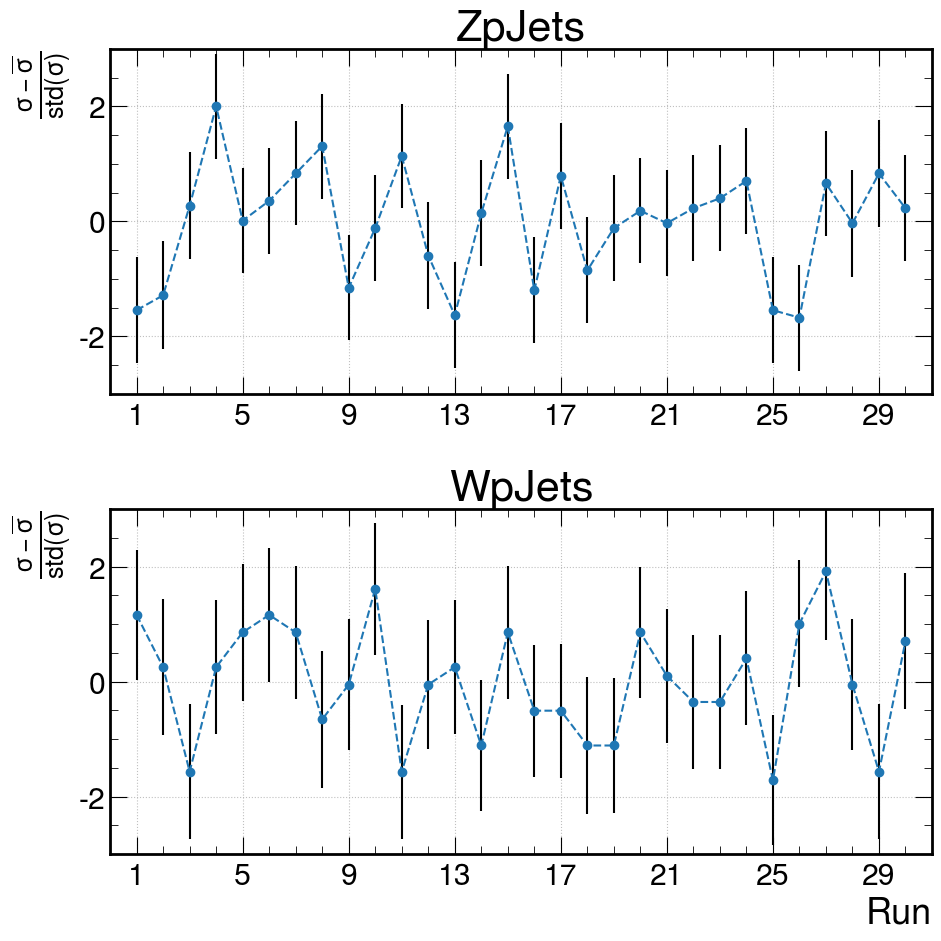

In [13]:
fig, ax = plt.subplots(2,1)
ax[0].errorbar(crossSec["run"], (crossSec["ZpJets"]-crossSec["ZpJets"].mean())/crossSec["ZpJets"].std(), yerr=crossSec["errorZpJets"]/crossSec["ZpJets"].std(), marker='o', linestyle='--', ecolor="black")
ax[1].errorbar(crossSec["run"], (crossSec["WpJets"]-crossSec["WpJets"].mean())/crossSec["WpJets"].std(), yerr=crossSec["errorWpJets"]/crossSec["WpJets"].std(), marker='o', linestyle='--', ecolor="black")
ax[0].set_title("ZpJets")
ax[1].set_title("WpJets")
ax[1].set_xlabel("Run")
ax[0].set_ylabel(r"$\frac{\sigma - \overline{\sigma}}{\mathrm{std}(\sigma)}$")
ax[1].set_ylabel(r"$\frac{\sigma - \overline{\sigma}}{\mathrm{std}(\sigma)}$")
ax[0].set_xlim(crossSec.run.min()-1,crossSec.run.max()+1)
ax[1].set_xlim(crossSec.run.min()-1,crossSec.run.max()+1)
ax[0].set_ylim(-3,3)
ax[1].set_ylim(-3,3)
ax[0].set_xticks([i for i in range(crossSec.run.min(),crossSec.run.max()+1, 4)])
ax[1].set_xticks([i for i in range(crossSec.run.min(),crossSec.run.max()+1, 4)])
ax[0].grid()
ax[1].grid()
plt.tight_layout()
plt.show()

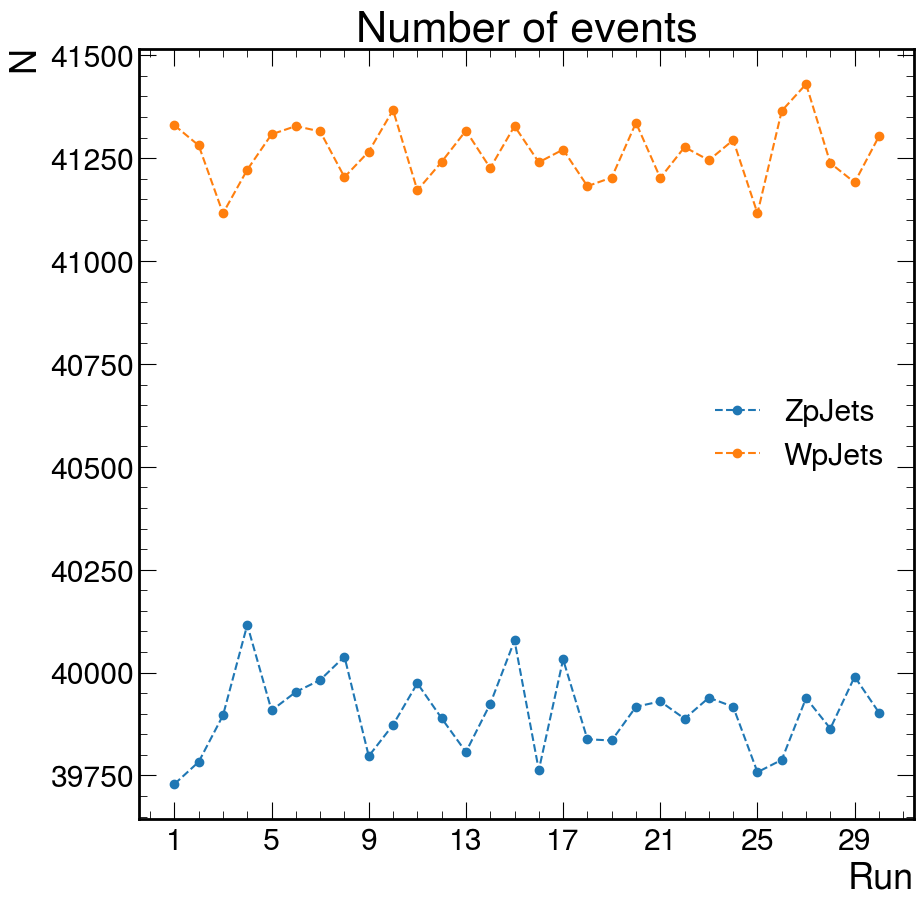

In [14]:
plt.plot(crossSec["run"],crossSec["NeventsZpJets"], marker='o', linestyle='--', label='ZpJets')
plt.plot(crossSec["run"],crossSec["NeventsWpJets"], marker='o', linestyle='--', label='WpJets')
plt.title("Number of events")
plt.xlabel("Run")
plt.ylabel(r"$N$")
plt.xticks([i for i in range(crossSec.run.min(),crossSec.run.max()+1, 4)])
plt.legend()
plt.show()

In [15]:
(crossSec["NeventsZpJets"]*crossSec["errorZpJets"]/(crossSec["ZpJets"]*1000)**2)

0     1.080833e-08
1     1.106774e-08
2     1.085252e-08
3     1.064834e-08
4     1.068803e-08
5     1.076691e-08
6     1.057620e-08
7     1.066108e-08
8     1.073363e-08
9     1.085815e-08
10    1.060288e-08
11    1.091491e-08
12    1.082935e-08
13    1.081175e-08
14    1.068764e-08
15    1.082343e-08
16    1.071838e-08
17    1.081918e-08
18    1.076175e-08
19    1.069094e-08
20    1.076227e-08
21    1.081231e-08
22    1.076578e-08
23    1.069745e-08
24    1.085694e-08
25    1.086741e-08
26    1.068527e-08
27    1.088119e-08
28    1.080080e-08
29    1.078095e-08
dtype: float64

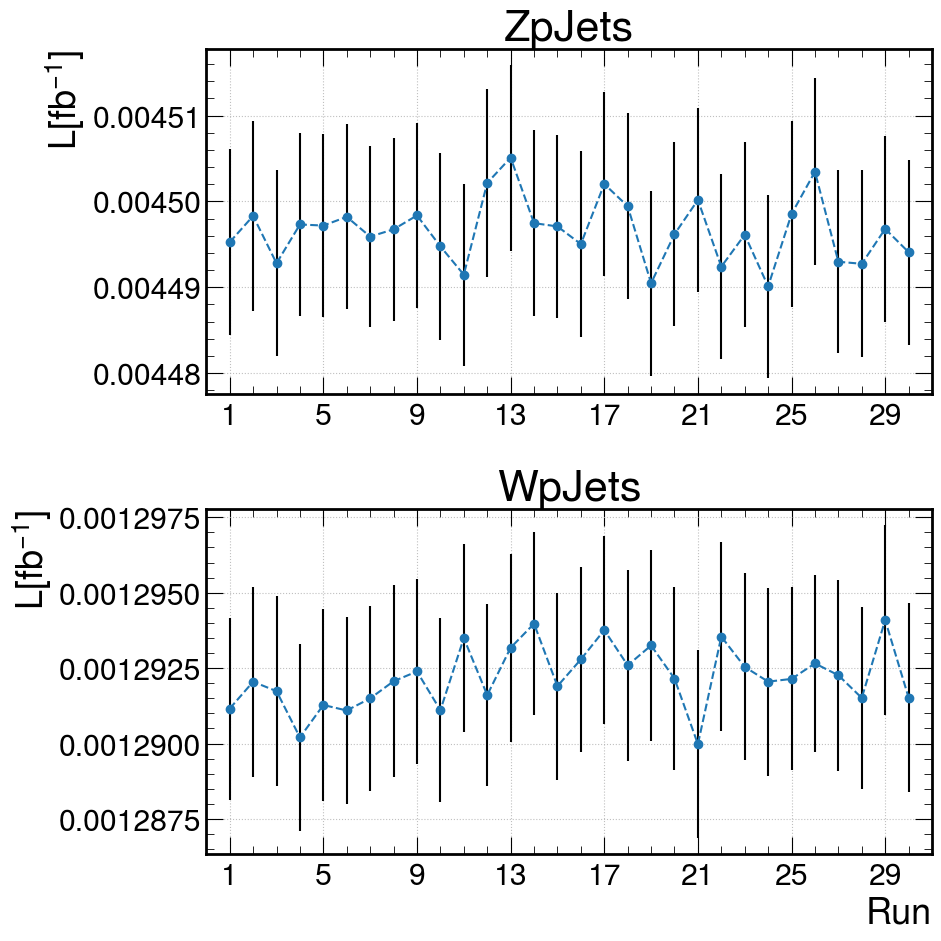

In [16]:
fig, ax = plt.subplots(2,1)
ax[0].errorbar(crossSec["run"], crossSec["NeventsZpJets"]*(1/1000)/(crossSec["ZpJets"]), yerr=(crossSec["NeventsZpJets"]*crossSec["errorZpJets"]*(1/1000)/(crossSec["ZpJets"])**2), marker='o', linestyle='--', ecolor="black")
ax[1].errorbar(crossSec["run"], crossSec["NeventsWpJets"]*(1/1000)/(crossSec["WpJets"]), yerr=(crossSec["NeventsWpJets"]*crossSec["errorWpJets"]*(1/1000)/(crossSec["WpJets"])**2), marker='o', linestyle='--', ecolor="black")
ax[0].set_title("ZpJets")
ax[1].set_title("WpJets")
ax[1].set_xlabel("Run")
ax[0].set_ylabel(r"$\mathcal{L} [$fb$^{-1}]$")
ax[1].set_ylabel(r"$\mathcal{L} [$fb$^{-1}]$")
ax[0].set_xlim(crossSec.run.min()-1,crossSec.run.max()+1)
ax[1].set_xlim(crossSec.run.min()-1,crossSec.run.max()+1)
#ax[0].set_ylim(-3,3)
#ax[1].set_ylim(-3,3)
ax[0].set_xticks([i for i in range(crossSec.run.min(),crossSec.run.max()+1, 4)])
ax[1].set_xticks([i for i in range(crossSec.run.min(),crossSec.run.max()+1, 4)])
ax[0].grid()
ax[1].grid()
plt.tight_layout()
plt.show()

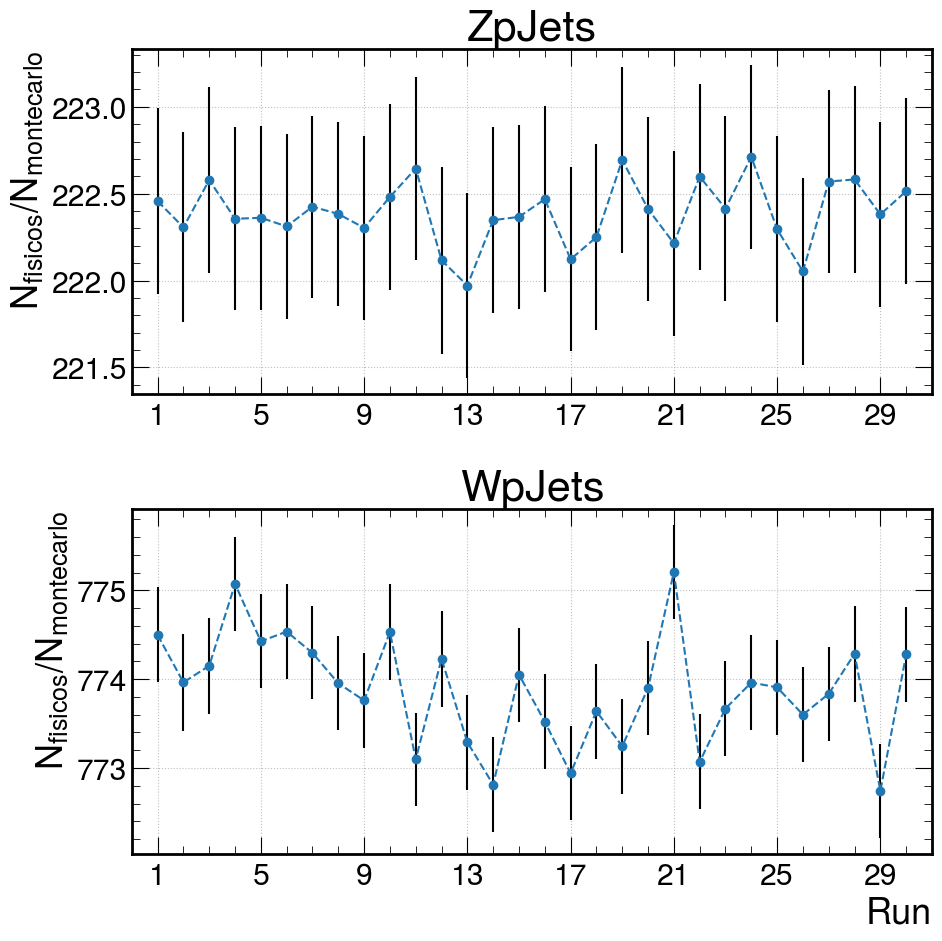

In [17]:
fig, ax = plt.subplots(2,1)
ax[0].errorbar(crossSec["run"], (crossSec["ZpJets"]*1000*lum)/crossSec["NeventsZpJets"], yerr=(crossSec["errorZpJets"]*1000*lum)/crossSec["NeventsZpJets"], marker='o', linestyle='--', ecolor="black")
ax[1].errorbar(crossSec["run"], (crossSec["WpJets"]*1000*lum)/crossSec["NeventsWpJets"], yerr=(crossSec["errorZpJets"]*1000*lum)/crossSec["NeventsZpJets"], marker='o', linestyle='--', ecolor="black")
ax[0].set_title("ZpJets")
ax[1].set_title("WpJets")
ax[1].set_xlabel("Run")
ax[0].set_ylabel(r"$N_{fisicos}/N_{montecarlo}$")
ax[1].set_ylabel(r"$N_{fisicos}/N_{montecarlo}$")
ax[0].set_xlim(crossSec.run.min()-1,crossSec.run.max()+1)
ax[1].set_xlim(crossSec.run.min()-1,crossSec.run.max()+1)
#ax[0].set_ylim(-3,3)
#ax[1].set_ylim(-3,3)
ax[0].set_xticks([i for i in range(crossSec.run.min(),crossSec.run.max()+1, 4)])
ax[1].set_xticks([i for i in range(crossSec.run.min(),crossSec.run.max()+1, 4)])
ax[0].grid()
ax[1].grid()
plt.tight_layout()
plt.show()

Valores promedio

In [18]:
labels = ['WpJets', 'ZpJets']
CSmean = [crossSec[i].mean() for i in labels]
dCSmean = [crossSec[f'error{i}'].mean() for i in labels]
totEvents = [crossSec[f'Nevents{i}'].sum() for i in labels]
totLuminosity = [totEvents[i]/CSmean[i] for i in range(2)]
dtotLuminosity = [dCSmean[i]*totLuminosity[i]/CSmean[i] for i in range(2)]
weight = [CSmean[i]*1000*lum/totEvents[i] for i in range(2)]
dweight = [dCSmean[i]*1000*lum/totEvents[i] for i in range(2)]
phyEvents = [weight[i]*totEvents[i] for i in range(2)]

print("Cross-section:")
for i in range(2):
    print(f"\t{labels[i]}: ",f"{CSmean[i]} +- {round(dCSmean[i],2)} pb")

print("Total Events:")
for i in range(2):
    print(f"\t{labels[i]}: ",f"{totEvents[i]}")

print("MG+Pythia Luminosity:")
for i in range(2):
    print(f"\t{labels[i]}: ",f"{round(totLuminosity[i],2)} +- {round(dtotLuminosity[i],2)} pb^(-1)")

print(f"Weights with L={lum} fb^(-1)")
for i in range(2):
    print(f"\t{labels[i]}: ",f"{round(weight[i],2)} +- {round(dweight[i],2)}")

print("Total Physical Events:")
for i in range(2):
    print(f"\t{labels[i]}: ",f"{phyEvents[i]}")

Cross-section:
	WpJets:  31933.333333333332 +- 76.55 pb
	ZpJets:  8873.7 +- 21.26 pb
Total Events:
	WpJets:  1237914
	ZpJets:  1197048
MG+Pythia Luminosity:
	WpJets:  38.77 +- 0.09 pb^(-1)
	ZpJets:  134.9 +- 0.32 pb^(-1)
Weights with L=1 fb^(-1)
	WpJets:  25.8 +- 0.06
	ZpJets:  7.41 +- 0.02
Total Physical Events:
	WpJets:  31933333.333333332
	ZpJets:  8873700.0


In [19]:
Weight = {'WpJets': [weight[0]], 'ZpJets': [weight[1]]}
dfWeight = pd.DataFrame(Weight)
dfWeight.to_csv("BGweigths.csv")

In [20]:
data_w.columns

Index(['jet_pt0', 'jet_pt1', 'jet_pt2', 'jet_pt3', 'jet_eta0', 'jet_eta1',
       'jet_eta2', 'jet_eta3', 'jet_phi0', 'jet_phi1', 'jet_phi2', 'jet_phi3',
       'jet_mass0', 'jet_mass1', 'jet_mass2', 'jet_mass3', 'jet_btag0',
       'jet_btag1', 'jet_btag2', 'jet_btag3', 'jet_tautag0', 'jet_tautag1',
       'jet_tautag2', 'jet_tautag3', 'missinget_met', 'missinget_phi',
       'muon_pt0', 'muon_pt1', 'muon_pt2', 'muon_pt3', 'muon_eta0',
       'muon_eta1', 'muon_eta2', 'muon_eta3', 'muon_phi0', 'muon_phi1',
       'muon_phi2', 'muon_phi3', 'muon_charge0', 'muon_charge1',
       'muon_charge2', 'muon_charge3', 'electron_pt0', 'electron_pt1',
       'electron_pt2', 'electron_pt3', 'electron_eta0', 'electron_eta1',
       'electron_eta2', 'electron_eta3', 'electron_phi0', 'electron_phi1',
       'electron_phi2', 'electron_phi3', 'electron_charge0',
       'electron_charge1', 'electron_charge2', 'electron_charge3'],
      dtype='object')

In [21]:
data_w[data_w['jet_pt0'].isnull()][data_w.columns[24:]]

,missinget_met,missinget_phi,muon_pt0,muon_pt1,muon_pt2,muon_pt3,muon_eta0,muon_eta1,muon_eta2,muon_eta3,...,electron_eta2,electron_eta3,electron_phi0,electron_phi1,electron_phi2,electron_phi3,electron_charge0,electron_charge1,electron_charge2,electron_charge3
54,1.356266,0.551965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,39.614204,0.330192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,28.292337,0.759576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,24.592506,1.728949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153,43.577232,1.351555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41212,23.990892,-2.269303,20.153118,NaN,NaN,NaN,3.553815,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41220,36.773968,-2.898770,37.103592,NaN,NaN,NaN,2.427092,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41243,34.923912,3.016733,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.001961,NaN,NaN,NaN,-1.0,NaN,NaN,NaN
41248,7.756652,0.747454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
